# Семинар по трехмерной геометрии и градиентному спуску

### Визуализация функции от двух переменных

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
%matplotlib inline

In [2]:
def plot_3d(fun, a=-1, b=1, c=-1, d=1, trace=None):
    """
    Визуализирует функцию fun на квадрате [a, b] x [c, d]
    fun : функция, принимающая два аргумента 
         (np.array одинакового размера) и возвращающая
          np.array того же размера со значениями функции
          в соответствующих точках
    Дополнительно возможно нарисовать ломаную линию из N точек,
    лежащую на получившейся поверхности
    trace : np.array размера N x 2 - координаты на плоскости,
            обозначающие точки ломаной
    """
    fig = plt.figure()

    # Make grid
    x1_ = np.linspace(a, b, 100)
    x2_ = np.linspace(c, d, 100)
    x1, x2 = np.meshgrid(x1_, x2_)
    y = fun(x1, x2)

    # Plot the surface
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(x1, x2, y, alpha=0.6)
    ax.contour(x1, x2, y, zdir='z', 
                  offset=y.min(), cmap=cm.coolwarm)
    
    # Plot 3d line 
    if trace is not None:
        y_trace = fun(trace[:, 0], trace[:, 1])
        ax.plot(trace[:, 0], trace[:, 1], y_trace, "o-")
        ax.set_xlim(x1.min(), x1.max())
        ax.set_ylim(x2.min(), x2.max())
        ax.set_zlim(y.min(), y.max())

Вам дана функция, визуализирующая поверхности. Ознакомьтесь с ее интерфейсом.

Например, отобразим трехмерную параболу:

In [3]:
fun = lambda x1, x2: x1**2 + x2**2

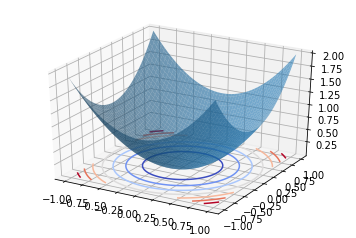

In [7]:
plot_3d(fun)

Круги на плоскости показывают проекции линий уровня поверхности.

Нарисуйте плоскость $y = x_1 + 2 x_2 + 3$:

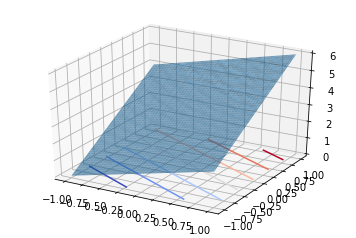

In [8]:
# your code here
fun_1 = lambda x1, x2: x1+2*x2+3
plot_3d(fun_1)

Нарисуйте плоскость, параллельную любой из горизонтальных осей:

/Users/vkokhtev/programs/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


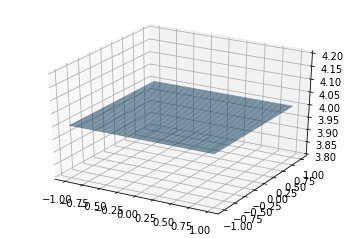

In [11]:
# your code here
fun_2 = lambda x1, x2: 0*x1+0*x2 + 4
plot_3d(fun_2)

Нарисуйте плоскость, проходящую через начало координат:

/Users/vkokhtev/programs/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


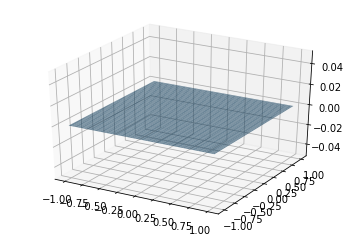

In [16]:
# your code here
fun_3 = lambda x1, x2: 0*x1+0*x2+0
plot_3d(fun_3)

### Вычисление градиентов функции

Градиент функции $f(x) = f(x_1, \dots, x_d)$ от многих переменных - это вектор ее частных производных.
$$\nabla_x f = \biggl(\frac{\partial f}{\partial x_1}, \dots, \frac{\partial f}{\partial x_1} \biggr )$$

Разберем два простых примеры вычисления градиента в случае функции от двух переменных.

__Теоретическая задача 1.__ Найдите градиент линейной функции $f(x) = f(x_1, x_2) = c_1 x_1 + c_2 x_2$ ($c_1$ и $c_2$ - фиксированные числа). 

$$\nabla_x f = (c_1, c_2)$$

Если непонятно, можно взять конкретные коэффициенты, например $c_1 = 3$ и $c_2 = 7$. 

__Теоретическая задача 2.__ Найдите градиент квадратичной функции $f(x) = f(x_1, x_2) = c_1 x_1^2 + c_2 x_2^2$ ($c_1$ и $c_2$ - фиксированные числа). 

$$\nabla_x f = (2 c_1 x_1, 2 c_2 x_2)$$

Если $c1=c2=c$, $\nabla_x f = 2cx$.

Ясно, что минимум такой квадратичной функции достигается в 0.
Наша следующая цель - найти этот минимум с помощью градиентного спуска. 

Воспользуемся кодом квадратичной функции (выше) и обобщим ее на случай любых коэффициентов:

In [17]:
def fun(x1, x2, c1=1, c2=1):
    return c1*x1**2 + c2*x2**2

Теперь надо реализовать ее градиент. Напишите код функции вычисления градиента в одной точке согласно описанию:

In [37]:
def grad_fun(x1, x2, c1=1, c2=1):
    """
    Функция берет 2 числа, обозначающую точку вычисления градиента,
    и возвращает np.array размера (2,) - градиент квадратичной функции
    Опциональные аргументы: c1 и c2 - коэффициенты
    """
    ### your code here
    
    return np.array([2*c1*x1, 2*c2*x2])

In [23]:
grad_fun(0, 0, c1=1, c2=1).shape

(2,)

Проверьте правильность (сверьте с формулой):

In [24]:
grad_fun(x1=0.5, x2=1.5, c1=2, c2=3)

array([2., 9.])

Теперь реализуем градиентны спуск. 
Он работает следующим образом: 
1. сначала инициализируется начальная точка x (это уже сделано)
1. затем повторяются итерации:
$$x = x - \alpha \nabla_x f$$
Здесь $\alpha$ - длина шага.

Допишите функцию согласно описанию:

In [61]:
def grad_descend(grad_fun, x0=np.random.rand(2) * 4 - 2, step_size=0.1, num_steps=20):
    """
    Реализует градиентный спуск
    Аргументы:
    * grad_fun - функция, вычисляющая градиент
    * step_size - длина шага
    * num_steps - число итераций
    
    Возвращает np.array размера (num_steps+1) x 2, 
    (i+1)-й элемент - точка на (i+1)-й итеарации,
    нулевой элемент - случайная инициализация
    """
    history = []
    
    x = x0
    x_current = x
    ### your code here
    for step in range(num_steps):
        history.append(x)
        x_current = x - step_size*grad_fun(*x)
        
#         print(x_current)
        if np.linalg.norm(x_current-x) < 1e-6:
            break
        x = x_current
        
    history.append(x_current)
    
    return np.array(history)
    

Протестируем функцию (последний элемент должен быть близок к 0):

Теперь мы готовы визуализировать градиентный спуск. Для этого передайте нашу траекторию оптимизации в качестве последнего аргумента функции plot_3d.

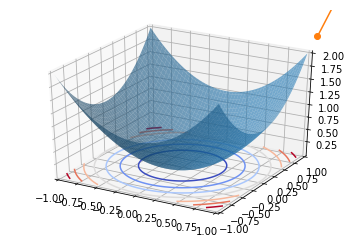

In [65]:
### your code here
trace = grad_descend(grad_fun, x0 = [10, 10], num_steps=10)
plot_3d(fun, a=-1, b=1, c=-1, d=1, trace=trace)

Может потребоваться запустить ячейку пару раз, чтобы траекторию было лучше видно.

Попробуйте разную длину шага (0.01, 0.1, 0.5, 1). Рекомендуется перед запуском градиентного спуска написать np.random.seed(<число>), чтобы все запуски были из одного начального приближения.

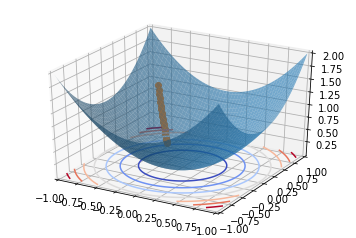

In [68]:
trace = grad_descend(grad_fun, x0=[1, 1], step_size=0.01, num_steps=20)
plot_3d(fun, a=-1, b=1, c=-1, d=1, trace=trace)

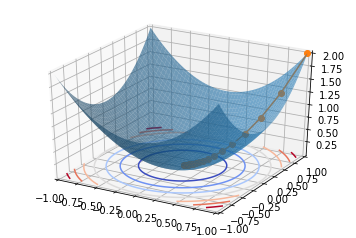

In [69]:
trace = grad_descend(grad_fun, x0=[1, 1], step_size= 0.1, num_steps=20)
plot_3d(fun, a=-1, b=1, c=-1, d=1, trace=trace)

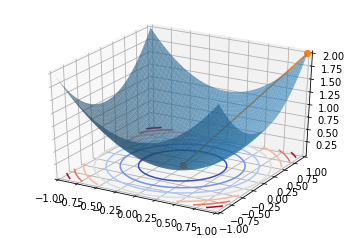

In [70]:
trace = grad_descend(grad_fun, x0=[1, 1], step_size= 0.5, num_steps=20)
plot_3d(fun, a=-1, b=1, c=-1, d=1, trace=trace)

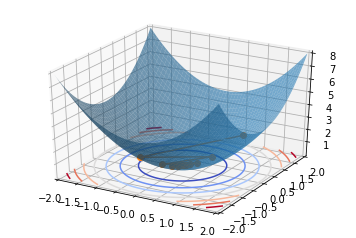

In [75]:
trace = grad_descend(grad_fun, x0=[1, 1], step_size=0.85, num_steps=20)
plot_3d(fun, a=-2, b=2, c=-2, d=2, trace=trace)

При маленькой длине шага процесс идет сишком медленно, при большой - может разойтись.

Наконец, попробуем использовать другие коэффициенты. Оптимизируйте функцию $f(x) = x_1^2 + 5 x_2^2$, пробуя длину шага (0.1, 0.2, 0.5):

In [78]:
def grad_fun(x1, x2, c1=1, c2=5):
    """
    Функция берет 2 числа, обозначающую точку вычисления градиента,
    и возвращает np.array размера (2,) - градиент квадратичной функции
    Опциональные аргументы: c1 и c2 - коэффициенты
    """
    ### your code here
    
    return np.array([2*c1*x1, 2*c2*x2])

In [82]:
fun = lambda x1, x2: x1**2 + 5*x2**2

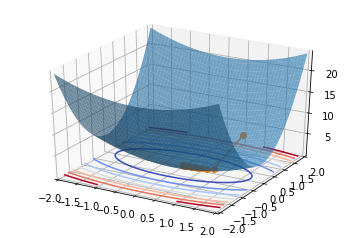

In [83]:
### your code here
trace = grad_descend(grad_fun, x0=[1, 1], step_size=0.1, num_steps=20)
plot_3d(fun, a=-2, b=2, c=-2, d=2, trace=trace)

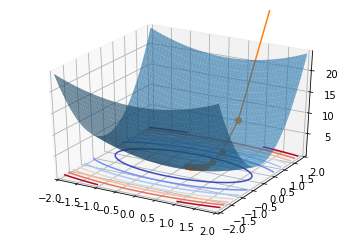

In [85]:
### your code here
trace = grad_descend(grad_fun, x0=[1, 10], step_size=0.05, num_steps=20)
plot_3d(fun, a=-2, b=2, c=-2, d=2, trace=trace)

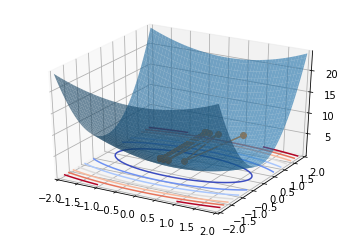

In [88]:
### your code here
trace = grad_descend(grad_fun, x0=[1, 1], step_size=0.2, num_steps=20)
plot_3d(fun, a=-2, b=2, c=-2, d=2, trace=trace)

"Вытянутую" функцию сложнее оптимизировать. Именно поэтмоу данные рекомендуется нормировать перед обучением модели, чтобы избежать таких колебаний при оптимизации.

In [89]:
from sklearn.datasets import load_boston

In [90]:
data = load_boston()

In [99]:
import pandas as pd

In [101]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])

In [104]:
target = data['target']

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(df, target)

In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [109]:
lr = LinearRegression()

In [110]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [113]:
mean_squared_error(y_test, lr.predict(X_test))

17.68855274295219

In [115]:
def grad_descend(grad_fun, x0=np.random.rand(2) * 4 - 2, step_size=0.1, num_steps=20):
    """
    Реализует градиентный спуск
    Аргументы:
    * grad_fun - функция, вычисляющая градиент
    * step_size - длина шага
    * num_steps - число итераций
    
    Возвращает np.array размера (num_steps+1) x 2, 
    (i+1)-й элемент - точка на (i+1)-й итеарации,
    нулевой элемент - случайная инициализация
    """
    history = []
    
    x = x0
    x_current = x
    ### your code here
    for step in range(num_steps):
        history.append(x)
        x_current = x - step_size*grad_fun(*x)
        
#         print(x_current)
        if np.linalg.norm(x_current-x) < 1e-6:
            break
        x = x_current
        
    history.append(x_current)
    

(379, 13)

In [ ]:
class LinReg():
    def __init__(self, step_size=0.1, num_steps=20, eps=1e-6):
        # веса
        self.w = None
        self.step_size = step_size
        self.num_steps = num_steps
        self.eps = eps
    
        
    def __calc_grad(self, X_train, y_train):
        
    
    def fit(self, X_train, y_train):
        self.w = np.zeros(X_train.shape[1])
        
        
        
        
        
        
    
    def predict(self, X_test):
        return np.dot(X_test, self.w)

In [120]:
np.dot(X_test, np.ones(X_train.shape[1])).shape

(127,)

In [121]:
X_test.shape

(127, 13)